In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

思路：可以增加的features
1. 是否同一ip地址多个帐号
2. 登录的平均间隔时间、最短间隔时间、最大间隔时间
3. 一天中的交易次数

注意点：
1. is_sec这个字段没有用，因为所有的值都是False

In [57]:
trade_df = pd.read_csv('./data/Risk_Detection_Qualification/t_trade.csv', index_col='rowkey', dtype={'id': np.str})
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
login_df = pd.read_csv('./data/Risk_Detection_Qualification/t_login.csv', index_col='log_id', 
                       dtype={'id': np.str, 'timestamp': np.str},
                       parse_dates=['time'], date_parser=dateparse)
trade_test_df = pd.read_csv('./data/Risk_Detection_Qualification/t_trade_test.csv', index_col='rowkey', dtype={'id': np.str})
login_test_df = pd.read_csv('./data/Risk_Detection_Qualification/t_login_test.csv', index_col='log_id', dtype={'id': np.str, 'timestamp': np.str})

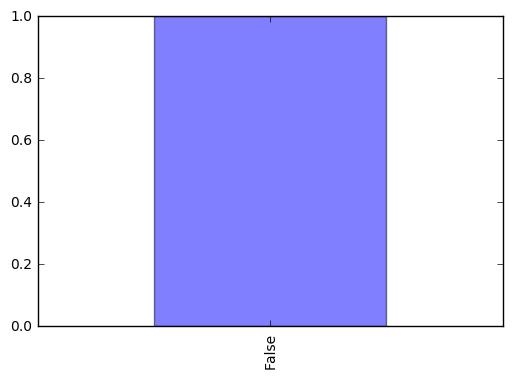

In [66]:
# 得到一列不同的值
# login_df['result'].unique()
# login_df['id'].unique()
# len(login_df['city'].unique()), len(login_df.index)
# login_df['is_risk'].count()
trade_df.shape, trade_df[trade_df['is_risk']==0].shape, trade_df[trade_df['is_risk']==1].shape
login_df.count()
#trade_df.is_risk.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
#login_df.is_sec.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
login_test_df.is_sec.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
#login_test_df.info()

In [25]:
trade_df_by_id = trade_df['is_risk'].groupby(trade_df['id'])

id_risk_trade   = trade_df[trade_df['is_risk']==1]['id']
id_nonrisk_trade = trade_df[trade_df['is_risk']==0]['id']
checked_id = set(id_risk) & set(id_nonrisk)
len(id_risk), len(id_nonrisk), len(checked_id)

(3643, 129076, 455)

In [74]:
login_df_by_id = login_df.groupby(login_df['id']).count()
print(login_df_by_id)
#ratio = len(trade_df[trade_df['is_risk']==1])/len(trade_df)
#len(trade_df[trade_df['is_risk']==1]), len(trade_df)
# login_df['id']

        timelong  device  log_from   ip  city  result  timestamp  type  \
id                                                                       
100002         9       9         9    9     9       9          9     9   
100006        21      21        21   21    21      21         21    21   
100019         4       4         4    4     4       4          4     4   
100020        36      36        36   36    36      36         36    36   
100024        11      11        11   11    11      11         11    11   
100027         3       3         3    3     3       3          3     3   
100039        25      25        25   25    25      25         25    25   
100046        45      45        45   45    45      45         45    45   
100058        18      18        18   18    18      18         18    18   
100063        10      10        10   10    10      10         10    10   
100068         9       9         9    9     9       9          9     9   
100070         9       9         9    

In [76]:
login_id_set = set(login_df['id'])
login_test_id_set = set(login_test_df['id'])
trade_id_set = set(trade_df['id'])
trade_id_set = set(trade_df['id'])
(login_id_set | login_test_id_set) > trade_id_set

#crossed_id_set = trade_id_set & login_id_set
#len(crossed_id_set), len(login_id_set), len(trade_id_set)
# '100190' in login_df['id']
#len(trade_id_set) < len(login_id_set)

True